In [37]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from util.model_eval import evaluate_clustering
from util.visualize_clusters import visualize_clusters


In [38]:
df = pd.read_csv('../prepared_data.csv')
features = df.drop(columns='Node')
features.head()

,Degree,ClusteringCoefficient,BetweennessCentrality,ClosenessCentrality,PageRank,EigenvectorCentrality,Eccentricity,Constraint,MeanNeighborDegree,LocalClusterSizes,LocalClusterDensities,sorensen_indices,participation_coefficient,CommunitySize,CommunityDensity,CommunityAssortativity
0,0.700547,0.419118,-0.057036,0.261376,1.000118,0.000006,1.043499,1.048030,-1.206914,-1.187895,0.047468,0.128317,1.078821,-0.849481,0.042446,-0.133841
1,0.597675,0.888889,-0.057268,0.261258,1.000100,0.000002,1.043499,1.100383,-1.206914,-1.187895,0.047468,0.122203,1.073933,-0.849481,0.042446,-0.133841
2,0.700547,0.632353,-0.057130,0.261376,1.000113,0.000007,1.043499,1.048897,-1.206914,-1.187895,0.047468,0.143140,1.078447,-0.849481,0.042446,-0.133841
3,0.597675,0.866667,-0.057259,0.261258,1.000116,0.000002,1.043499,1.149038,-1.206914,-1.187895,0.047468,0.110459,1.074068,-0.849481,0.042446,-0.133841
4,0.643779,0.333333,-0.057085,0.261308,1.000101,0.000012,1.043499,1.056431,-1.206914,-1.187895,0.047468,0.119667,1.076862,-0.849481,0.042446,-0.133841


In [39]:
features.isnull().sum()

Degree                        0
ClusteringCoefficient         0
BetweennessCentrality         0
ClosenessCentrality           0
PageRank                      0
EigenvectorCentrality         0
Eccentricity                  0
Constraint                    0
MeanNeighborDegree            0
LocalClusterSizes             0
LocalClusterDensities         0
sorensen_indices              0
participation_coefficient    29
CommunitySize                 0
CommunityDensity              0
CommunityAssortativity        0
dtype: int64

Imputing missing values with the feature's median

In [40]:
imputer = SimpleImputer(strategy="median")
features[['participation_coefficient']] = imputer.fit_transform(features[['participation_coefficient']])
features.isnull().sum()

Degree                       0
ClusteringCoefficient        0
BetweennessCentrality        0
ClosenessCentrality          0
PageRank                     0
EigenvectorCentrality        0
Eccentricity                 0
Constraint                   0
MeanNeighborDegree           0
LocalClusterSizes            0
LocalClusterDensities        0
sorensen_indices             0
participation_coefficient    0
CommunitySize                0
CommunityDensity             0
CommunityAssortativity       0
dtype: int64

Create initial DBSCAN model. 

The result is 18 clusters with 24 noise nodes.

In [41]:
dbscan = DBSCAN()
initial_labels = dbscan.fit_predict(features)
num_clusters = len(set(initial_labels)) - (1 if -1 in initial_labels else 0)
num_noise = np.sum(initial_labels == -1)

num_clusters, num_noise

(18, np.int64(24))

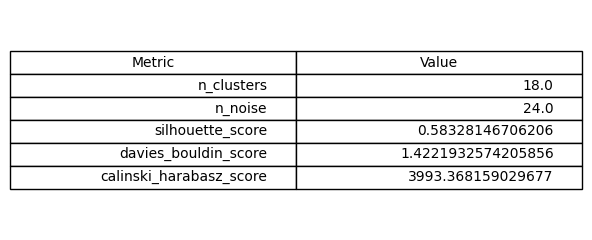

{'n_clusters': 18,
 'n_noise': np.int64(24),
 'silhouette_score': np.float64(0.58328146706206),
 'davies_bouldin_score': np.float64(1.4221932574205856),
 'calinski_harabasz_score': np.float64(3993.368159029677)}

In [42]:
evaluate_clustering(features, initial_labels)

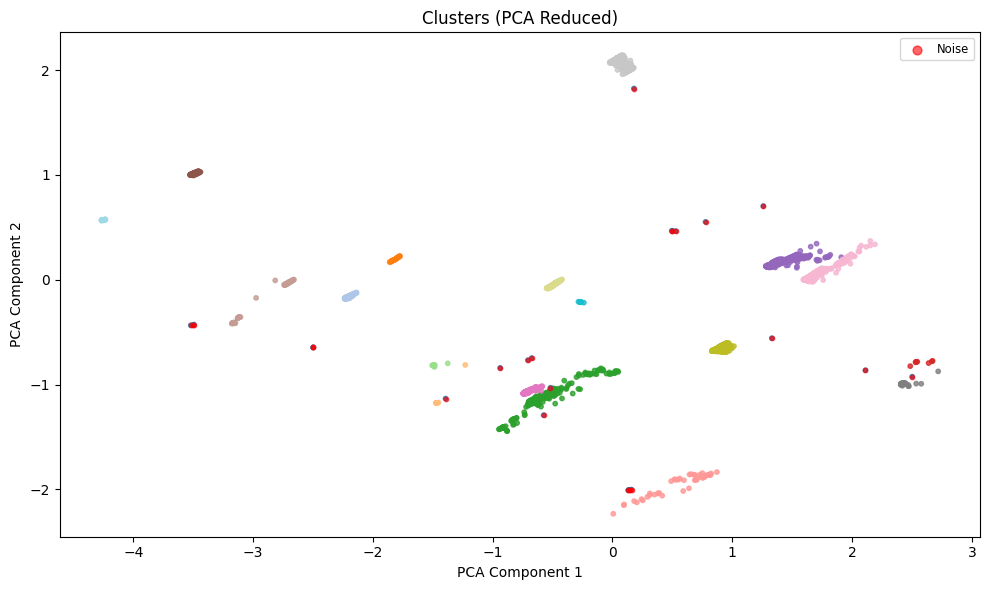

In [43]:
visualize_clusters(features, initial_labels)

In [44]:
features_w_initial_dbscan_labels = features.copy()
features_w_initial_dbscan_labels['cluster'] = initial_labels
features_w_initial_dbscan_labels.head()

,Degree,ClusteringCoefficient,BetweennessCentrality,ClosenessCentrality,PageRank,EigenvectorCentrality,Eccentricity,Constraint,MeanNeighborDegree,LocalClusterSizes,LocalClusterDensities,sorensen_indices,participation_coefficient,CommunitySize,CommunityDensity,CommunityAssortativity,cluster
0,0.700547,0.419118,-0.057036,0.261376,1.000118,0.000006,1.043499,1.048030,-1.206914,-1.187895,0.047468,0.128317,1.078821,-0.849481,0.042446,-0.133841,0
1,0.597675,0.888889,-0.057268,0.261258,1.000100,0.000002,1.043499,1.100383,-1.206914,-1.187895,0.047468,0.122203,1.073933,-0.849481,0.042446,-0.133841,0
2,0.700547,0.632353,-0.057130,0.261376,1.000113,0.000007,1.043499,1.048897,-1.206914,-1.187895,0.047468,0.143140,1.078447,-0.849481,0.042446,-0.133841,0
3,0.597675,0.866667,-0.057259,0.261258,1.000116,0.000002,1.043499,1.149038,-1.206914,-1.187895,0.047468,0.110459,1.074068,-0.849481,0.042446,-0.133841,0
4,0.643779,0.333333,-0.057085,0.261308,1.000101,0.000012,1.043499,1.056431,-1.206914,-1.187895,0.047468,0.119667,1.076862,-0.849481,0.042446,-0.133841,0
